In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Read the National Health and Nutrition Examination Survey dataset (nhanes.csv) into a DataFrame

- List out the info() about the DataFrame

[nhanes.csv](https://drive.google.com/file/d/1Og7XSFNcBCen6gSmbL_ECpiCvg5V0XZL/view?usp=sharing)

In [3]:
df = pd.read_csv('nhanes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 76 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                10000 non-null  int64  
 1   SurveyYr          10000 non-null  object 
 2   Gender            10000 non-null  object 
 3   Age               10000 non-null  int64  
 4   AgeDecade         9667 non-null   object 
 5   AgeMonths         4962 non-null   float64
 6   Race1             10000 non-null  object 
 7   Race3             5000 non-null   object 
 8   Education         7221 non-null   object 
 9   MaritalStatus     7231 non-null   object 
 10  HHIncome          9189 non-null   object 
 11  HHIncomeMid       9189 non-null   float64
 12  Poverty           9274 non-null   float64
 13  HomeRooms         9931 non-null   float64
 14  HomeOwn           9937 non-null   object 
 15  Work              7771 non-null   object 
 16  Weight            9922 non-null   float64

#### We are going to work with the 'BPSysAve' (Average of Systolic Blood Pressure) feature 

- List the descriptive statistics (mean, standard deviation, min, max, etc.) about that feature

In [7]:
df['BPSysAve'].describe()

count    8551.000000
mean      118.154953
std        17.248170
min        76.000000
25%       106.000000
50%       116.000000
75%       127.000000
max       226.000000
Name: BPSysAve, dtype: float64

#### Take 1000 random samples of at least 31 items from 'BPSysAve' and calculate the mean of each of those samples

- Create an empty list and add each sample mean to the list
- Once all the samples have been taken, convert the list to a Pandas Series (with dtype='float64')
- Plot a probability density function (pdf) on the series.

**What does the distribution of the pdf look like?**


<Axes: ylabel='Density'>

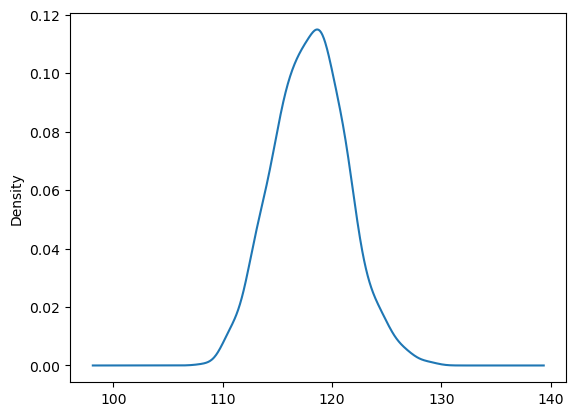

In [17]:
ran_list = []
for i in range(1000):
    #index BPSysAve in dataframe, were taking a sample of 31 items and taking the mean of each entry
    ran_list.append(df['BPSysAve'].sample(n=31,replace=False).mean())
ser=pd.Series(data=ran_list, dtype='float64')
ser.plot(kind='density')
    


#### Compare the mean of the samples with the mean of the BPSysAve feature

In [13]:
print("Sample:",ser.mean())
print("Population:",df['BPSysAve'].mean())

Sample: 118.09818768935435
Population: 118.15495263711847


#### Create a histogram that shows a cumulative distribution function for the 1000 samples

(array([0.009, 0.047, 0.159, 0.35 , 0.581, 0.806, 0.932, 0.978, 0.995,
        1.   ]),
 array([108.42857143, 110.49071429, 112.55285714, 114.615     ,
        116.67714286, 118.73928571, 120.80142857, 122.86357143,
        124.92571429, 126.98785714, 129.05      ]),
 [<matplotlib.patches.Polygon at 0x19b2d1674f0>])

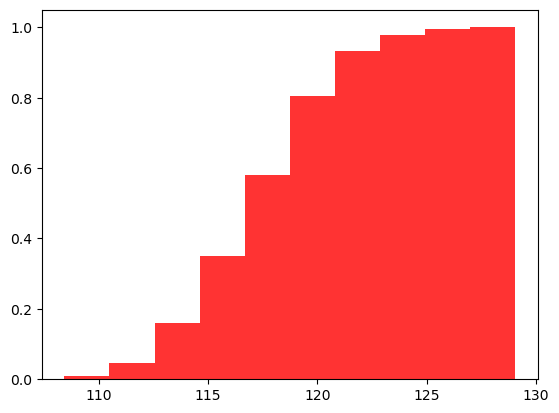

In [18]:
plt.hist(ser,density=True,cumulative=True,label='CDF',histtype='stepfilled',alpha=0.8,color='red')